# K-means clustering algorithm #

In [ ]:
using LinearAlgebra
using VMLS
using Plots

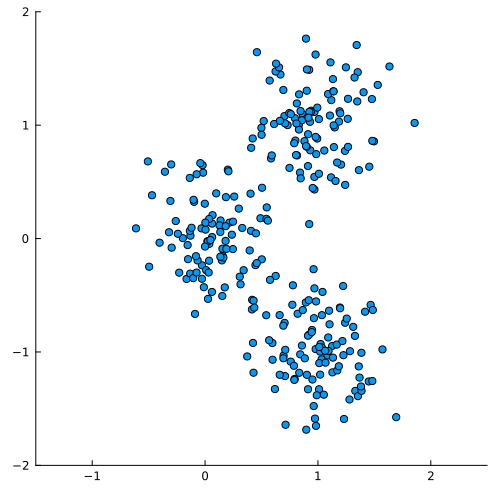

In [36]:
# Generated data 
X = [
    [0.3*randn(2) for i=1:100];
    [[1, 1] + 0.3*randn(2) for i=1:100];
    [[1,-1] + 0.3*randn(2) for i = 1:100]
]
scatter([x[1] for x in X], [x[2] for x in X])
plot!(legend = false, grid = false, size = (500, 500), xlims = (-1.5, 2.5), ylims = (-2, 2))

In [50]:
using Printf 
Q(x, z, assignment) = avg(norm(x[i]-z[assignment[i]])^2 for i=1:length(x))

function kmeans(x, k, maxiters = 100, tol = 1e-5)
    N = length(x)
    n = length(x[1])
    z = [ zeros(n) for j = 1:k ]
    assignment = [rand(1:k) for i=1:N]
    J = [Inf, Inf]

    for iter=1:maxiters 
        for j=1:k
            group = [i for i =1:N if assignment[i] == j]
            z[j] = sum(x[group])/length(group)
        end

        for i=1:N
            assignment[i] = argmin([ norm(x[i] - z[j]) for j=1:k ] )
        end

        J[2] = Q(x, z, assignment)
        @printf("iterations (%d, %d): J = %s .\n", iter-1, iter, J)
        
         if iter > 1 && abs(J[2]-J[1]) < tol*J[2]
            return assignment, z 
        end
        J[1] = J[2]
    end
end

kmeans (generic function with 3 methods)

iterations (0, 1): J = [Inf, 0.987621325660089] .
iterations (1, 2): J = [0.987621325660089, 0.28478248594548433] .
iterations (2, 3): J = [0.28478248594548433, 0.1836922708021466] .
iterations (3, 4): J = [0.1836922708021466, 0.1746005767215969] .
iterations (4, 5): J = [0.1746005767215969, 0.17410216086430194] .
iterations (5, 6): J = [0.17410216086430194, 0.17410216086430194] .


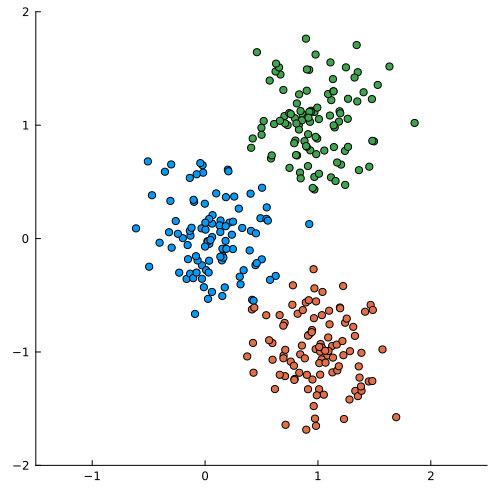

In [55]:
assignment, z = kmeans(X, 3) 
groups = [[X[i] for i=1:length(X) if assignment[i] == j] for j=1:length(z)]
scatter([x[1] for x in groups[1]], [x[2] for x in groups[1]])
scatter!([x[1] for x in groups[2]], [x[2] for x in groups[2]])
scatter!([x[1] for x in groups[3]], [x[2] for x in groups[3]])
plot!(legend = false, grid = false, size = (500, 500), xlims = (-1.5, 2.5), ylims = (-2, 2))